In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [2]:
#load the dataset
df = pd.read_csv("boston-housing-dataset.csv")

In [3]:
df.drop("Unnamed: 0",axis= 1,inplace=True)

In [4]:
df.reset_index(drop = True,inplace= True)

In [5]:
df.rename(columns = {'MEDV':"Price"},inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
# Check the missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# EDA
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
sns.pairplot(df)

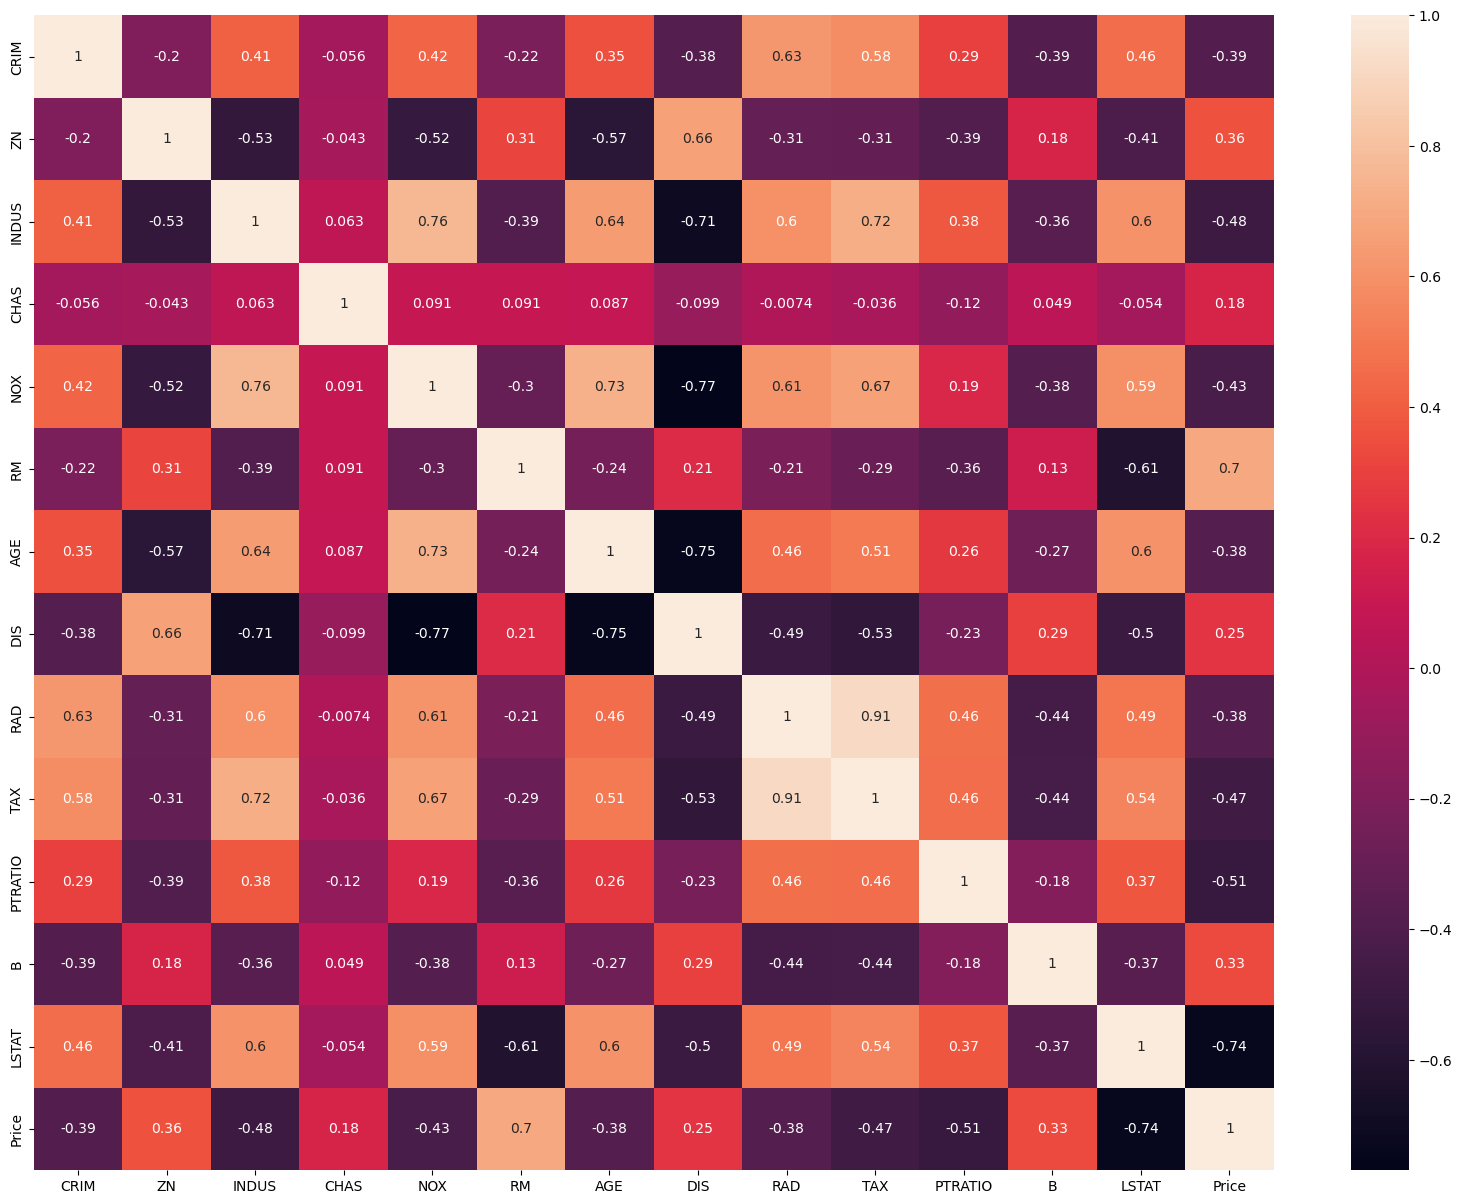

In [10]:
plt.figure(figsize =(20,15))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [11]:
sns.set(rc = {'figure.figsize':(15,10)})

Text(0, 0.5, 'Price')

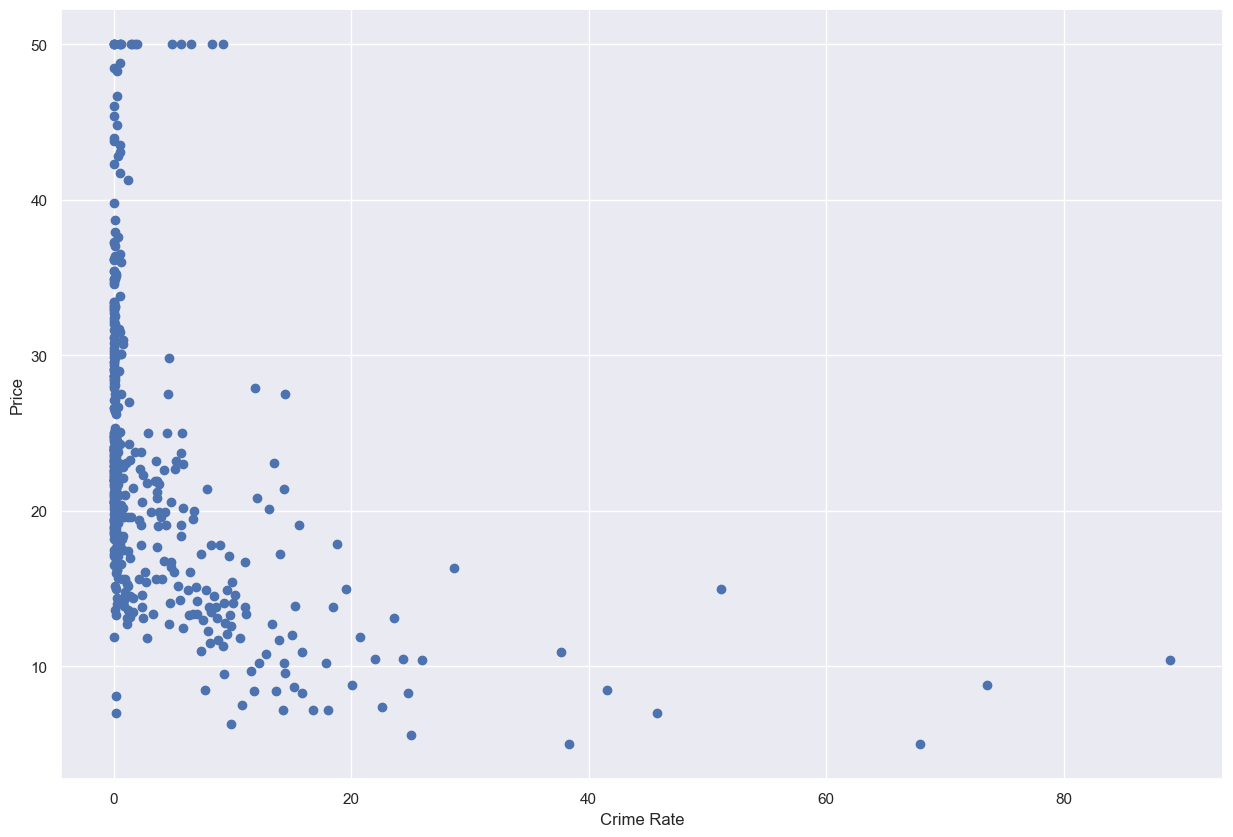

In [12]:
plt.scatter(df['CRIM'],df['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

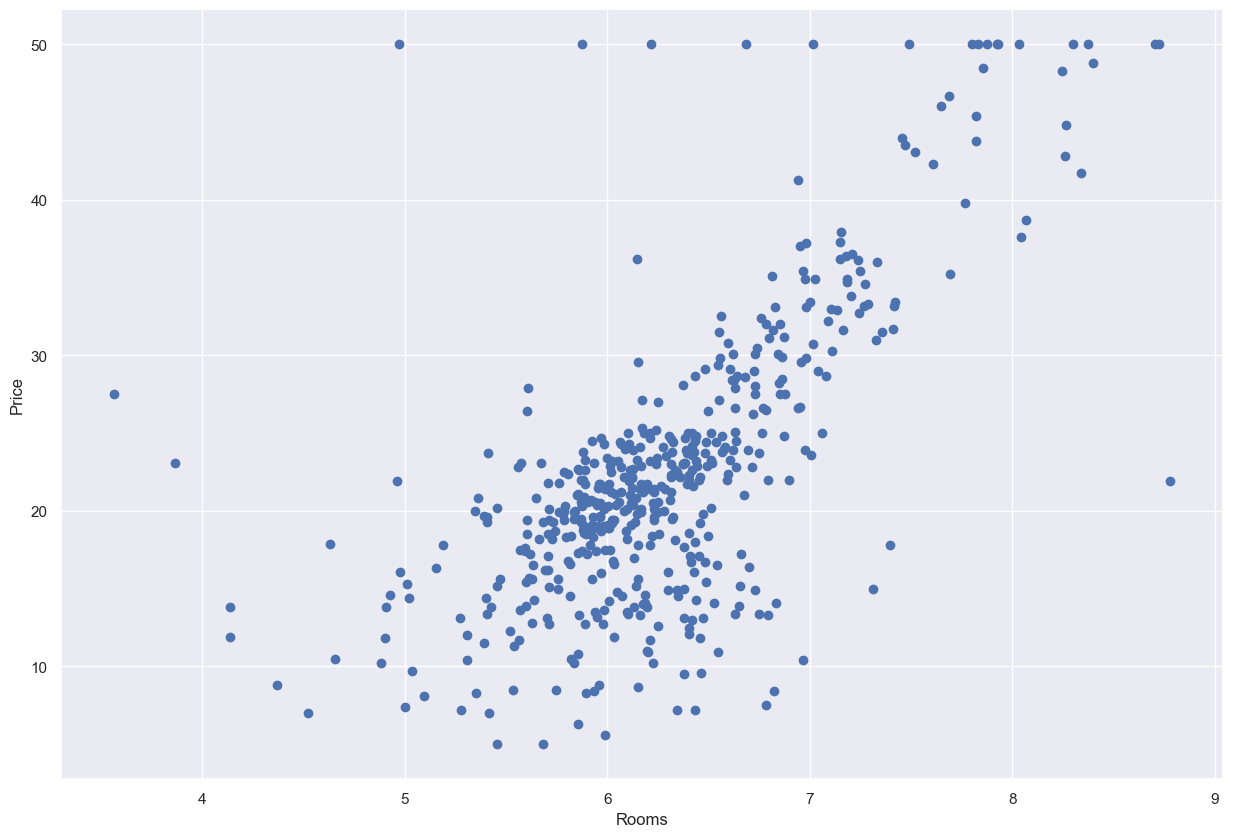

In [13]:
plt.scatter(df['RM'],df['Price'])
plt.xlabel("Rooms")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='Price'>

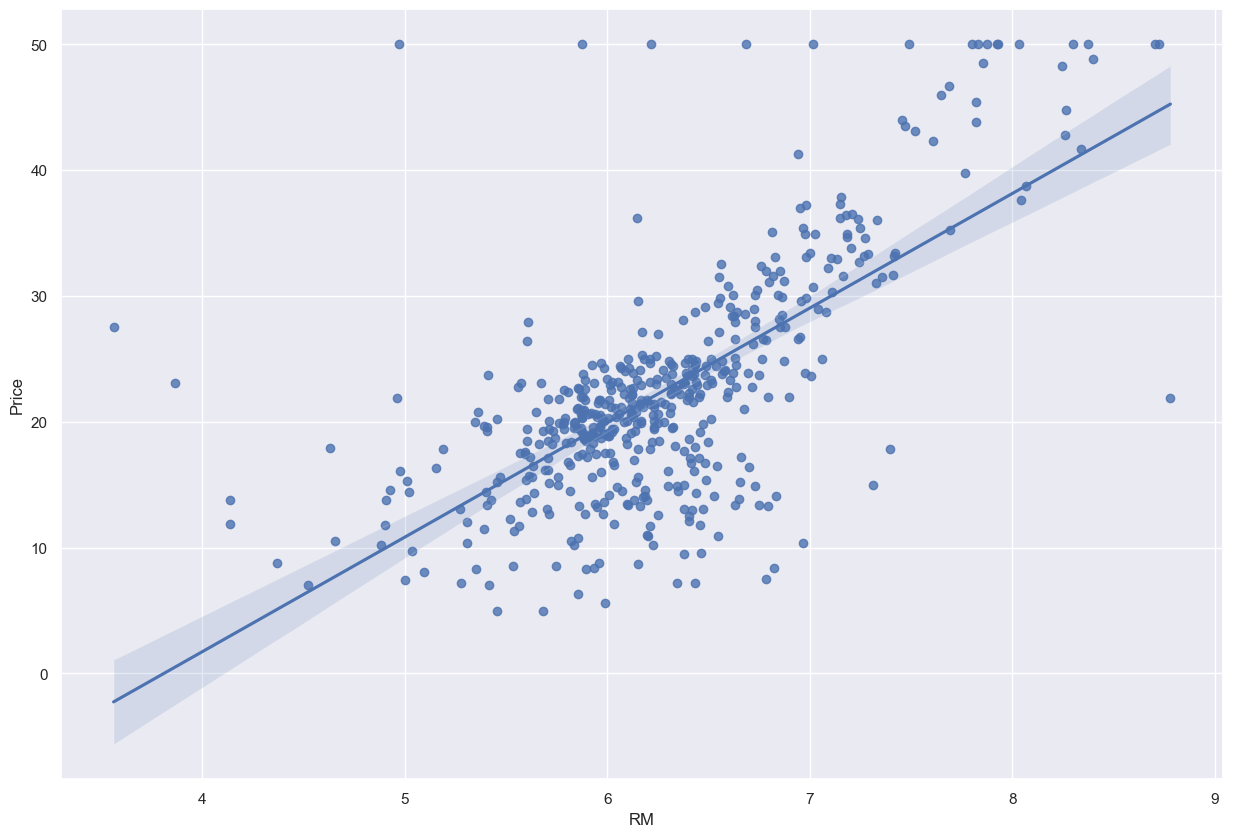

In [14]:
sns.regplot(x = 'RM',y = "Price",data=df)

<Axes: xlabel='LSTAT', ylabel='Price'>

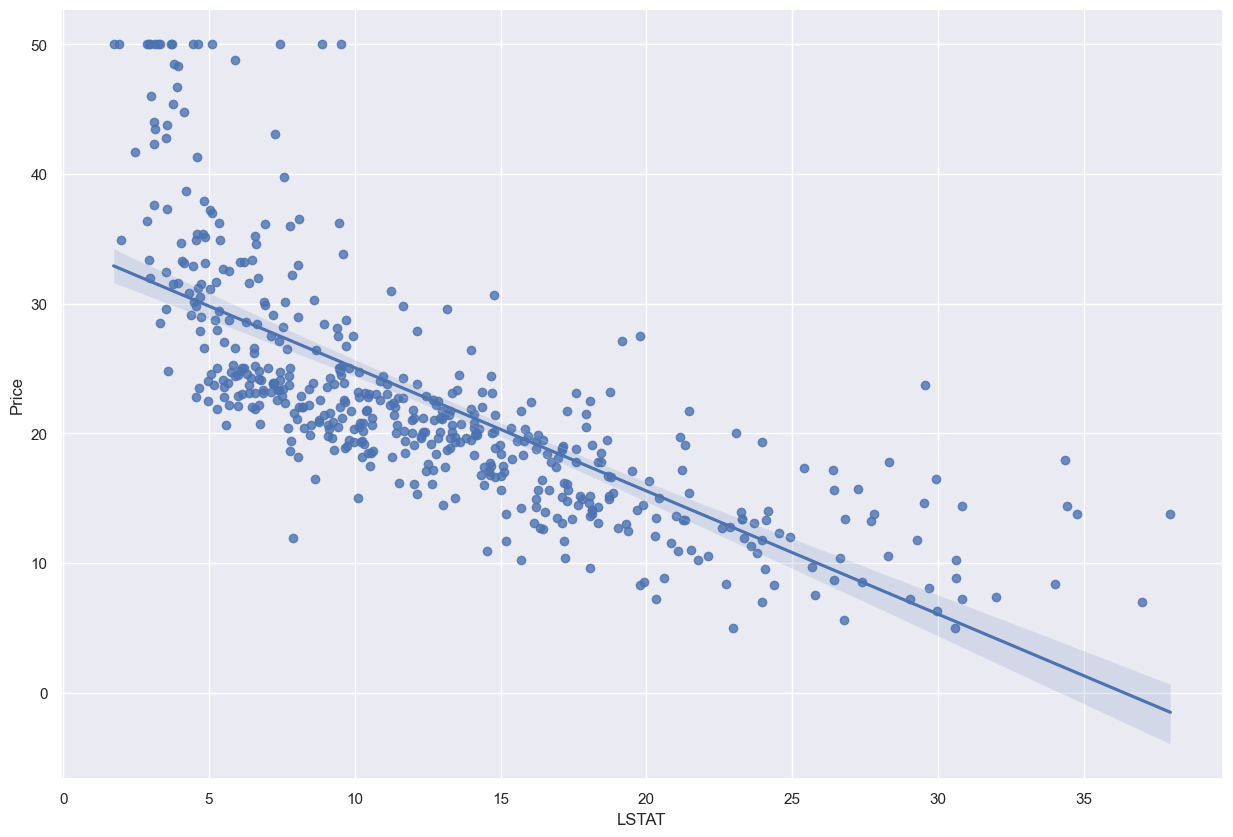

In [15]:
sns.regplot(x ="LSTAT",y="Price",data= df)

<Axes: xlabel='CRIM', ylabel='Price'>

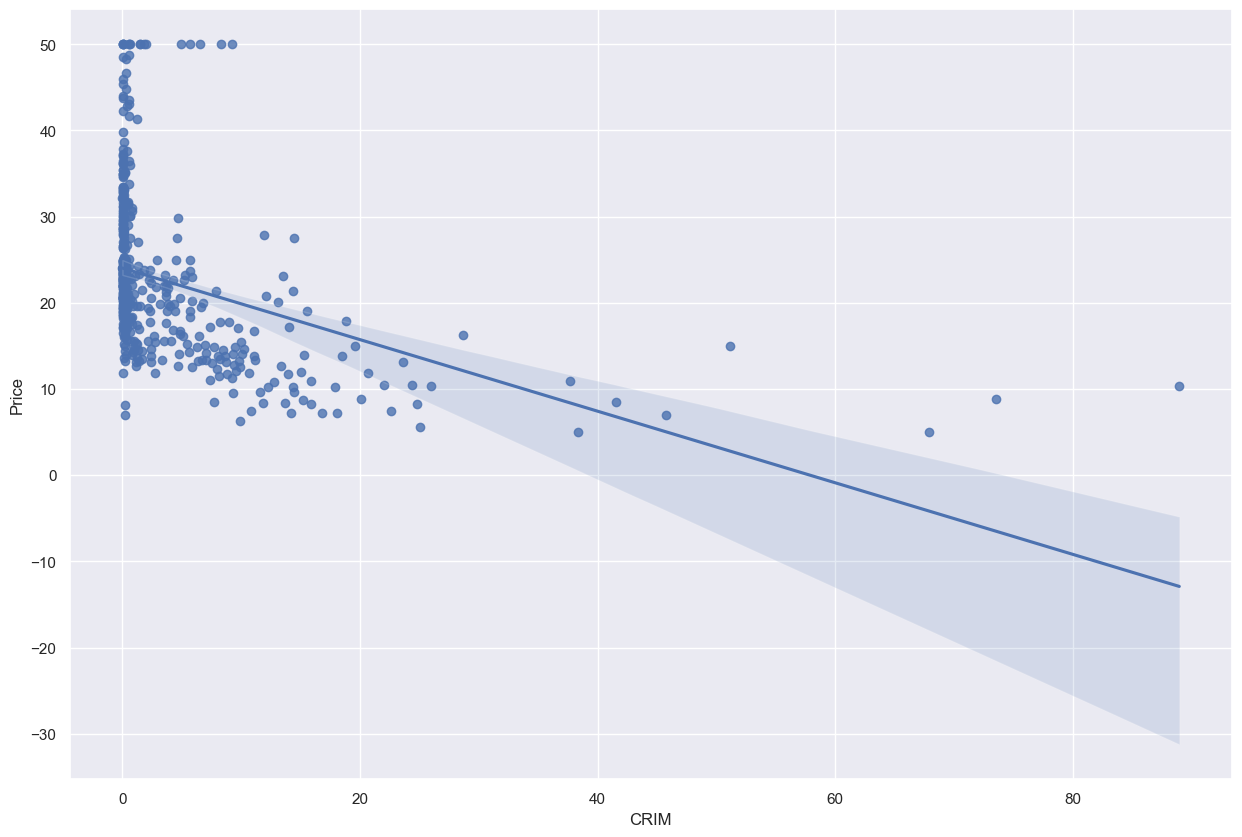

In [16]:
sns.regplot(x ="CRIM",y="Price",data= df)

<Axes: >

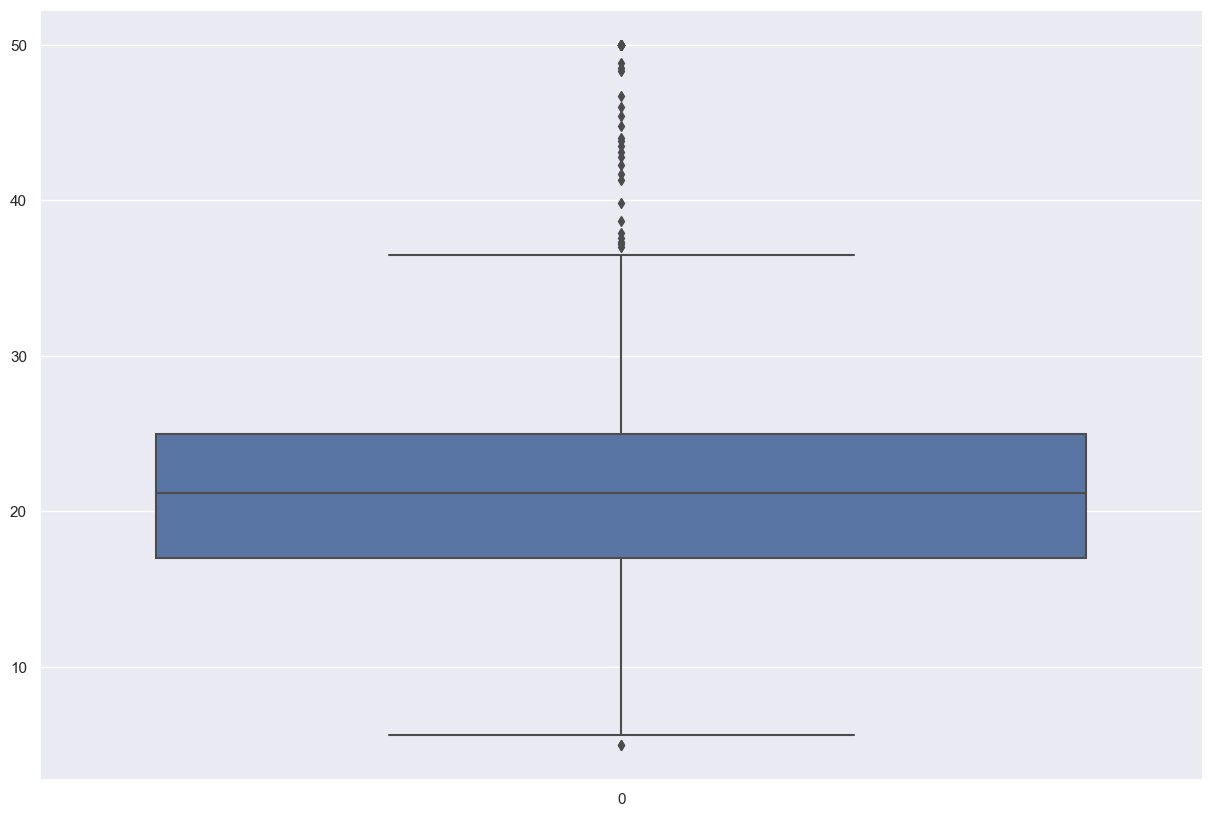

In [17]:
sns.boxplot(df["Price"],)

<Axes: >

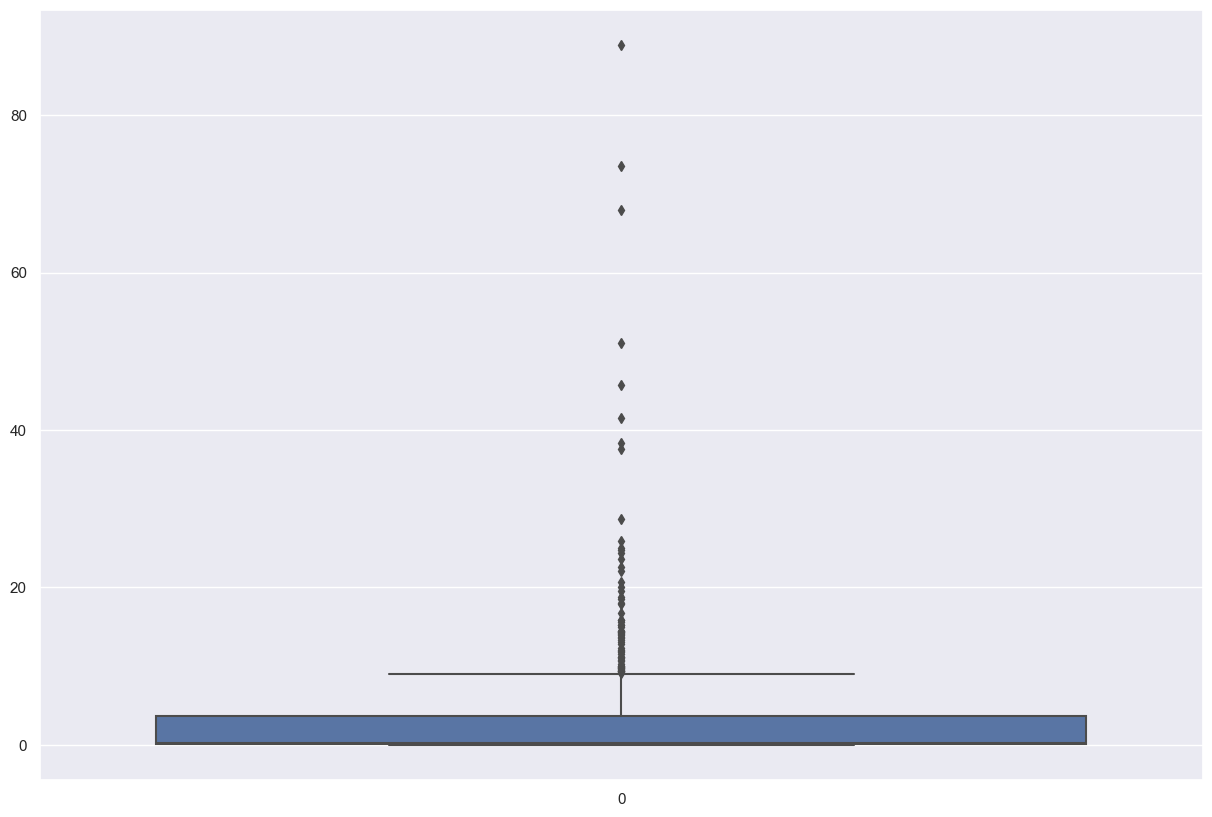

In [18]:
sns.boxplot(df['CRIM'])

In [19]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

## Training the Model

In [20]:
## Independent And Dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [22]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [25]:
X_train.shape

(339, 13)

In [26]:
y_train.shape

(339,)

In [27]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.10793,0.0,8.56,0,0.520,6.195,54.4,2.7778,5,384.0,20.9,393.49,13.00
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287.0,19.6,396.90,6.87
265,0.76162,20.0,3.97,0,0.647,5.560,62.8,1.9865,5,264.0,13.0,392.40,10.45
29,1.00245,0.0,8.14,0,0.538,6.674,87.3,4.2390,4,307.0,21.0,380.23,11.98


In [28]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: Price, Length: 167, dtype: float64

In [29]:
#Standardize of feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
scaler

StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

In [32]:
X_test = scaler.transform(X_test)  # transform and not fit_transform due to leaking of the data

In [33]:
X_train

array([[ 0.89624872, -0.51060139,  0.98278223, ...,  0.86442095,
         0.24040357,  0.77155612],
       [-0.34895881, -0.51060139, -0.44867555, ...,  1.22118698,
         0.20852839,  0.32248963],
       [-0.41764058,  0.03413008, -0.48748013, ..., -1.36536677,
         0.43481957,  0.92775316],
       ...,
       [-0.43451148,  2.97567999, -1.32968321, ..., -0.56264319,
         0.36745216, -0.90756208],
       [ 1.01703049, -0.51060139,  0.98278223, ...,  0.86442095,
        -2.80977992,  1.50233514],
       [-0.40667333, -0.51060139, -0.38831288, ...,  1.17659123,
        -3.25117205, -0.26046005]])

In [34]:
X_test

array([[-0.42451319, -0.51060139, -1.03649306, ..., -0.74102621,
         0.41899501, -0.48220406],
       [-0.42911576,  1.2325393 , -0.6973123 , ..., -0.29506866,
         0.43481957, -1.25063772],
       [-0.42269508, -0.51060139,  2.36824941, ...,  0.8198252 ,
         0.35807046,  0.77713459],
       ...,
       [-0.33727525,  0.36096896, -1.04799071, ..., -2.34647337,
         0.38395492, -0.28556314],
       [-0.30591027, -0.51060139, -0.44867555, ...,  1.22118698,
         0.2463943 , -0.07218683],
       [-0.36872487,  0.36096896, -1.04799071, ..., -2.34647337,
         0.32133488, -0.91871901]])

## Model Training

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regression = LinearRegression()

In [37]:
regression.fit(X_train,y_train)

LinearRegression()

In [38]:
# print the coefficients and the intercepts
print(regression.coef_)

[-0.98858032  0.86793276  0.40502822  0.86183791 -1.90009974  2.80813518
 -0.35866856 -3.04553498  2.03276074 -1.36400909 -2.0825356   1.04125684
 -3.92628626]


In [39]:
print(regression.intercept_)

22.970796460176988


In [40]:
# Prediction for the test data
reg_pred = regression.predict(X_test)

In [41]:
reg_pred

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

In [42]:
#Assumptions of Linear Regression

## 1st Assumption

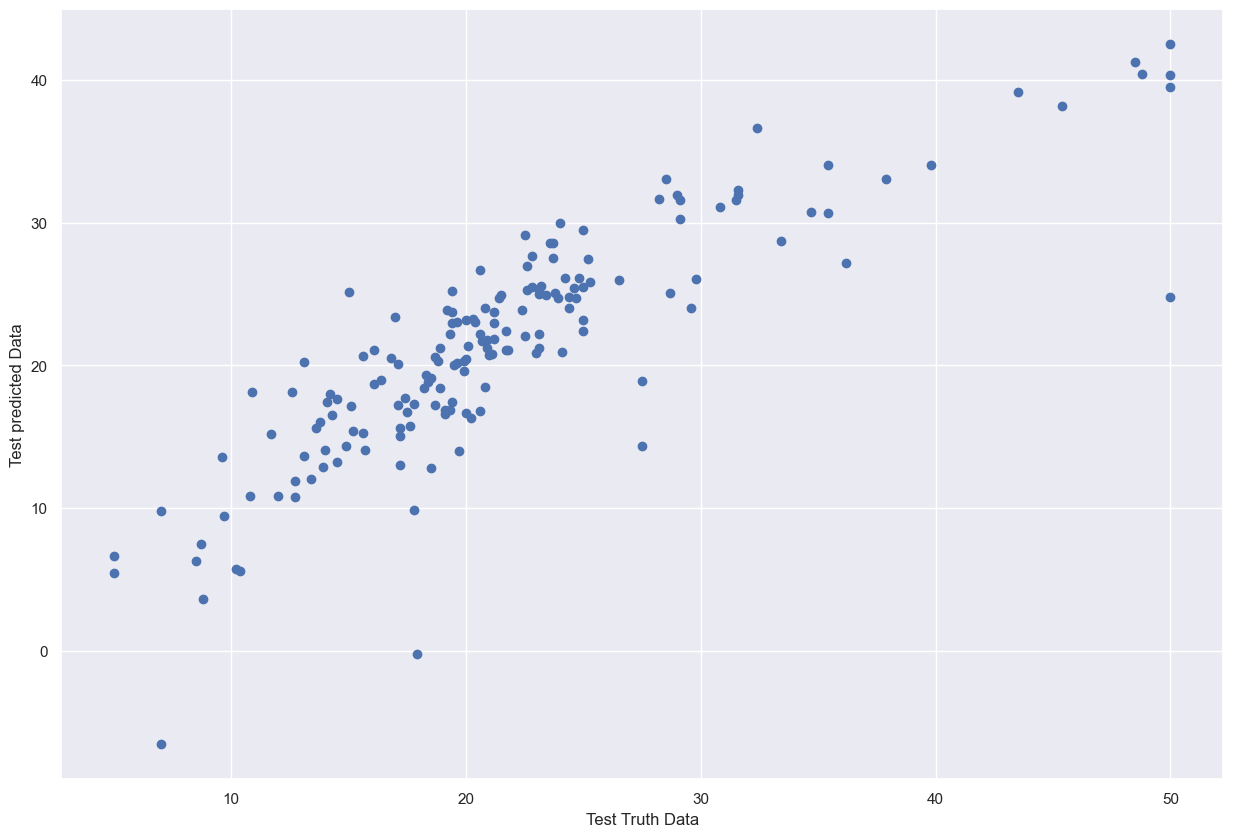

In [43]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test predicted Data")
plt.show()

## 2nd Assumption

In [44]:
## residuals
residuals = y_test-reg_pred
residuals

173   -4.934695
274   -4.218701
491   -2.037511
72    -2.701450
452   -2.609673
         ...   
110    0.642557
321   -1.917346
265   -4.854619
29     0.297942
262    8.417851
Name: Price, Length: 167, dtype: float64

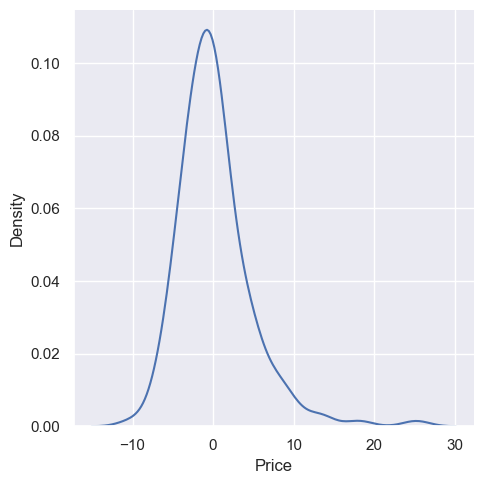

In [45]:
sns.displot(residuals,kind="kde")  #residuals should be approximately NORMALLY Distributed

## Third Assumption

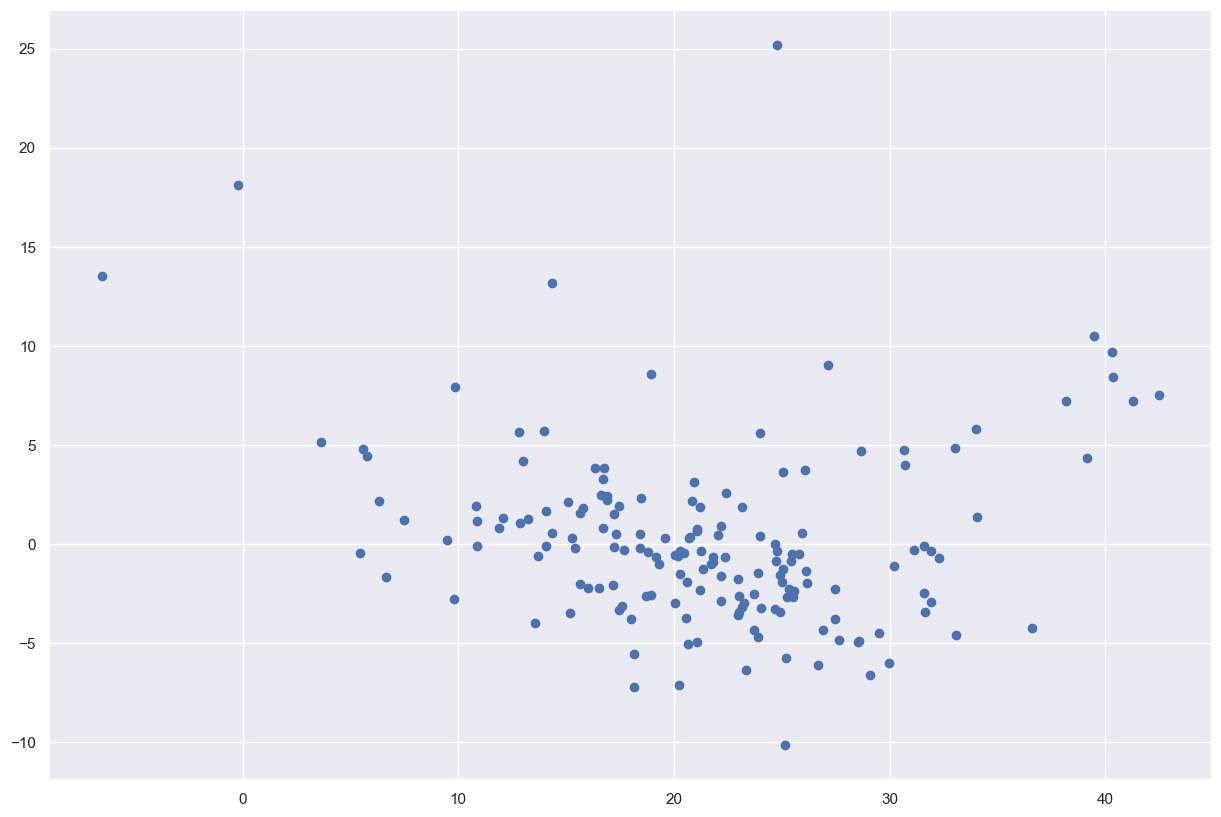

In [46]:
# Scatter plot with predictions and residual 
# uniform distribution
plt.scatter(reg_pred,residuals)

## There are no shapes ,therefore it is uniformly distributed

## These techniques are called Homoscedasticity

In [47]:
# Performance Matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

20.724023437339753
3.148255754816832
4.552364598463062


## R sqaure and adjusted R square

In [48]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.7261570836552476


In [49]:
## Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7028893848808568

In [50]:
## Do Ridge, Lasso, and Elasticnet

# Ridge Regression

In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [52]:
print(ridge.coef_)

[-0.97541551  0.84608896  0.37564928  0.86738391 -1.86077739  2.81535042
 -0.36108635 -3.00177053  1.95063015 -1.29462251 -2.06972563  1.03867858
 -3.91121554]


In [53]:
print(ridge.intercept_)

22.970796460176988


In [54]:
## Prediction of the test data
ridge_pred = ridge.predict(X_test)
ridge_pred

array([28.50742044, 36.56623172, 15.74385228, 25.49107605, 18.70449805,
       23.16555674, 17.3353633 , 14.11553585, 22.94790581, 20.56605905,
       24.89034838, 18.45231813, -6.44592912, 21.85588536, 19.15767075,
       26.02049072, 20.20418625,  5.75334034, 40.26109346, 17.45757103,
       27.43625   , 30.15008183, 10.86542778, 23.8922577 , 17.98002216,
       15.97783016, 23.27084129, 14.39145132, 22.39046559, 19.33913789,
       22.14761798, 25.0633962 , 25.12323651, 18.44886131, 16.56498494,
       17.51980787, 30.71926279, 20.06321173, 24.0051703 , 24.93961773,
       14.01804472, 31.55716108, 42.36411402, 17.74514996, 26.92815913,
       17.13671991, 13.73088718, 26.14522758, 20.23784138, 30.01688815,
       21.23834632, 33.98097943, 15.46847103, 25.98238451, 39.0872846 ,
       22.93270116, 18.79729577, 32.98900997, 24.75121546, 12.88534635,
       22.44620063, 30.6177806 , 31.5496446 , 16.3728183 , 21.07398052,
       16.71642532, 20.21399742, 26.13275151, 31.06390949, 11.90

## Assumptions of Ridge Regression

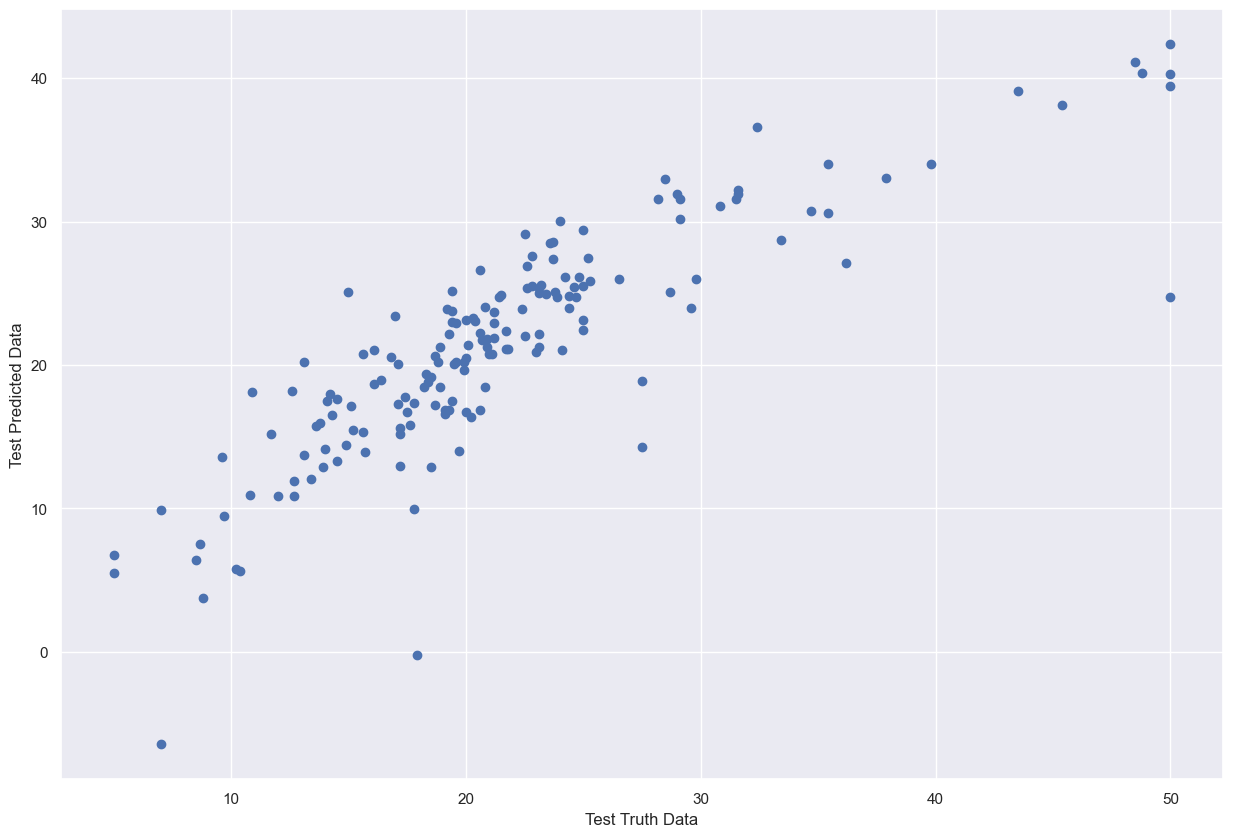

In [58]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")
plt.show()

## Second Assumption

In [59]:
residuals = y_test - ridge_pred
residuals

173   -4.907420
274   -4.166232
491   -2.143852
72    -2.691076
452   -2.604498
         ...   
110    0.612742
321   -1.920144
265   -4.804533
29     0.250849
262    8.445592
Name: Price, Length: 167, dtype: float64

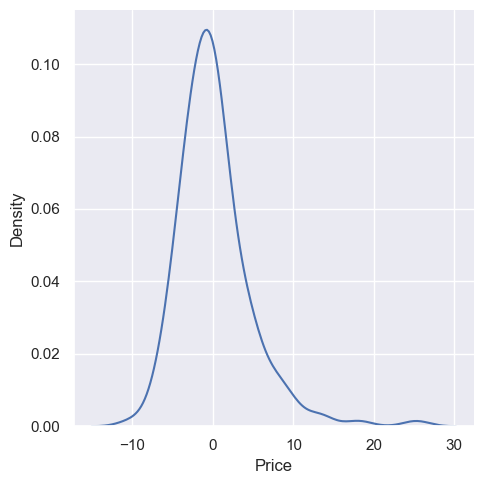

In [66]:
sns.displot(residuals,kind = "kde")

## Third Assumption
- Distribution between the residuals and the predicted value should be uniformly distributed

Text(0, 0.5, 'Predicted Points')

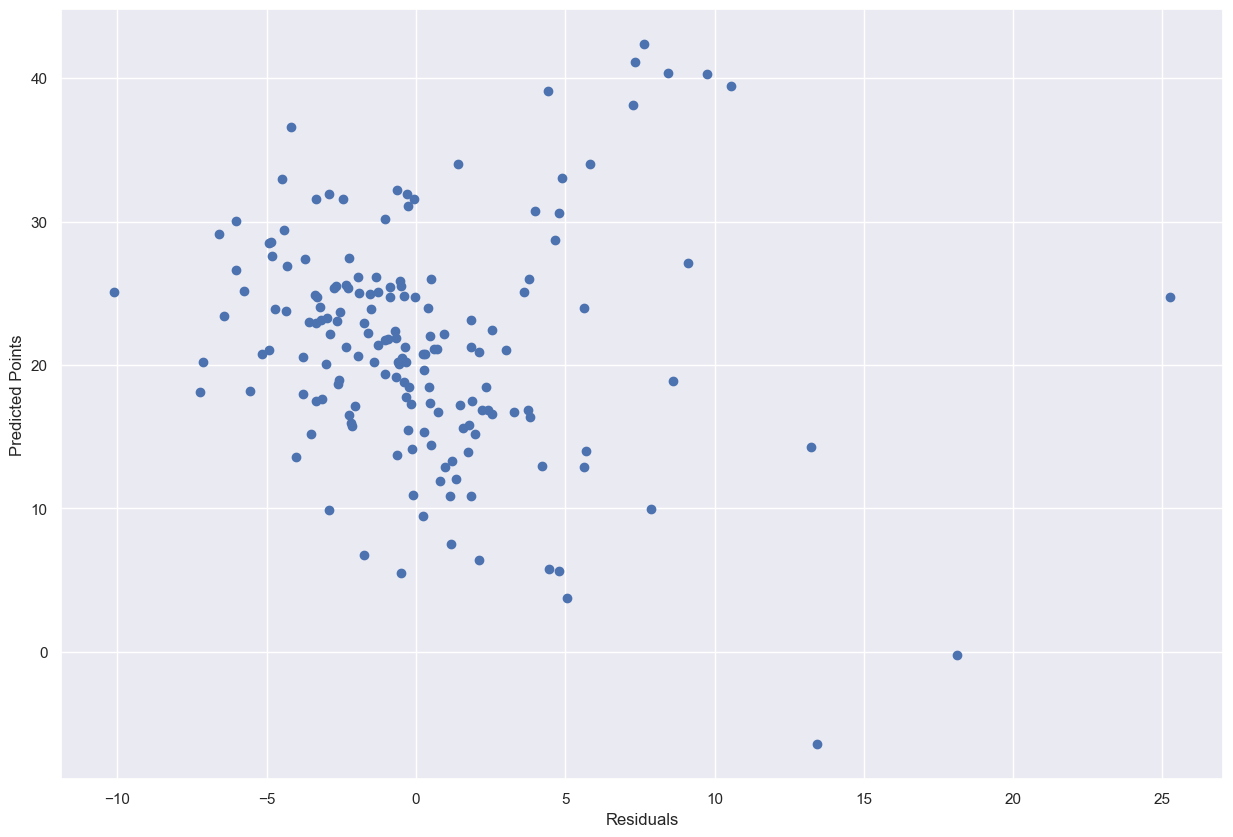

In [67]:
plt.scatter(residuals,ridge_pred)
plt.xlabel("Residuals")
plt.ylabel("Predicted Points")

In [68]:
# Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

20.75241632080031
3.146011462661696
4.555482007515814


## R square and adjusted R square 

In [69]:
from sklearn.metrics import r2_score
score = r2_score(y_test,ridge_pred)
score

0.7257819060246209

In [70]:
## Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7024823294123338

# Lasso Regression Model

In [72]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
print(lasso.coef_)

[-0.          0.         -0.          0.27140271 -0.          2.62932147
 -0.         -0.         -0.         -0.         -1.21106809  0.29872625
 -3.81788375]


In [73]:
print(lasso.intercept_)

22.970796460176988


In [74]:
# Prediction of the test data
lasso_pred = lasso.predict(X_test)

In [75]:
lasso_pred

array([26.08015466, 30.7480057 , 17.78164882, 25.25224684, 19.28387274,
       22.81161765, 18.31125182, 14.6359243 , 21.41277818, 20.44276659,
       20.7857368 , 21.00978479,  1.29101416, 22.48591111, 20.4207989 ,
       24.73115299, 18.16643043,  6.95747132, 35.82658816, 18.45664358,
       25.66618031, 26.77096265, 13.79601995, 24.00317031, 18.83677575,
       15.53225538, 22.93567982, 18.81410882, 19.96419904, 19.71394554,
       19.9929271 , 25.48086778, 25.07506471, 19.62299031, 15.87164442,
       20.47826644, 30.90020658, 21.73740698, 21.69357896, 24.78795141,
       14.48946282, 27.49872616, 36.28097645, 19.68302782, 25.54695918,
       17.26691093, 16.01035524, 25.87512519, 19.3705841 , 29.52965183,
       23.10173719, 31.37342903, 17.55332715, 25.82107048, 34.98857199,
       22.91267519, 19.3967501 , 29.34678421, 24.65125376, 16.72971658,
       25.42537393, 30.6751849 , 28.90511192, 18.42571639, 27.56426639,
       14.62706882, 20.02272756, 25.60745002, 28.32959623, 15.91

## Assumptions

## First Assumption

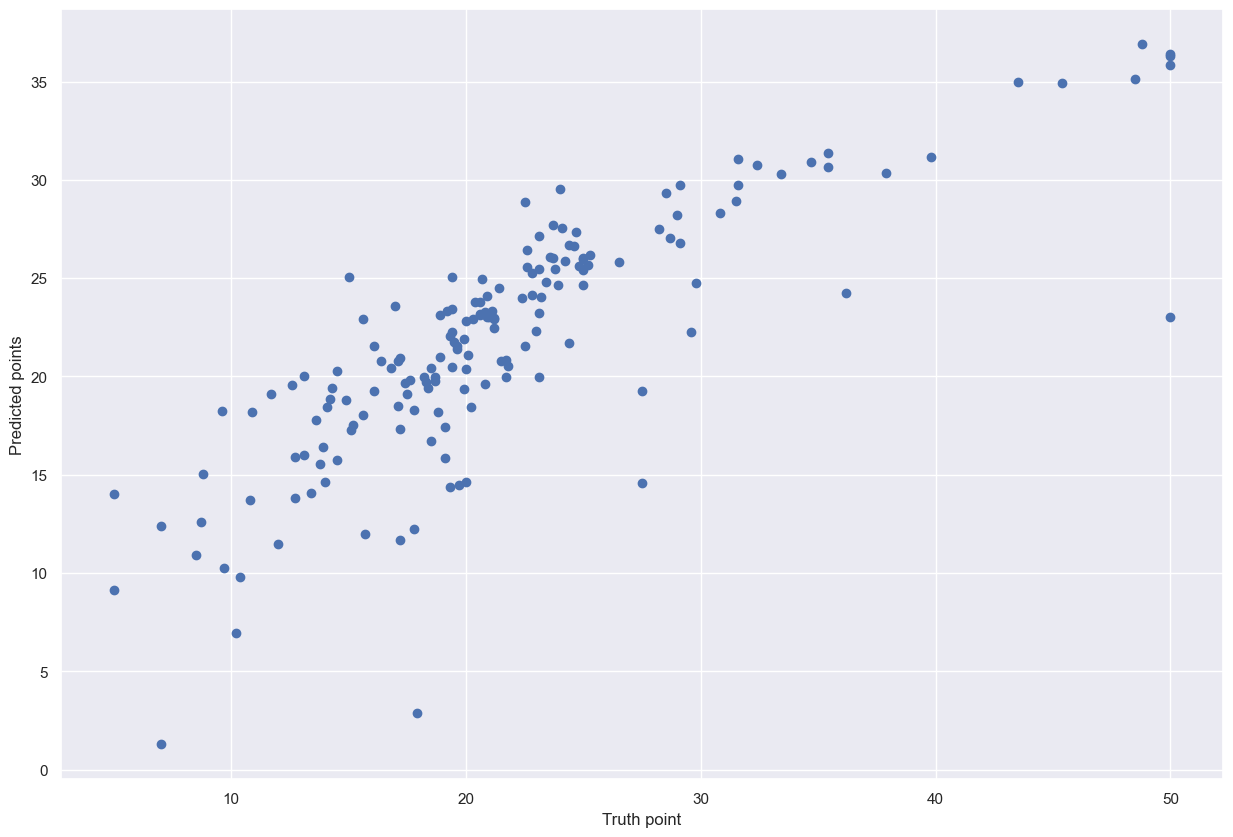

In [76]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Truth point")
plt.ylabel("Predicted points")
plt.show()

## Second Assumption

In [77]:
residuals = y_test - lasso_pred
residuals

173    -2.480155
274     1.651994
491    -4.181649
72     -2.452247
452    -3.183873
         ...    
110     0.864934
321    -2.373897
265    -1.335776
29     -2.029446
262    11.896754
Name: Price, Length: 167, dtype: float64

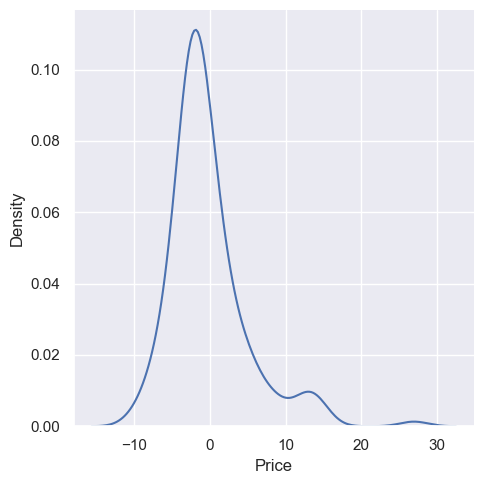

In [78]:
sns.displot(residuals,kind ="kde")

## Third Assumption

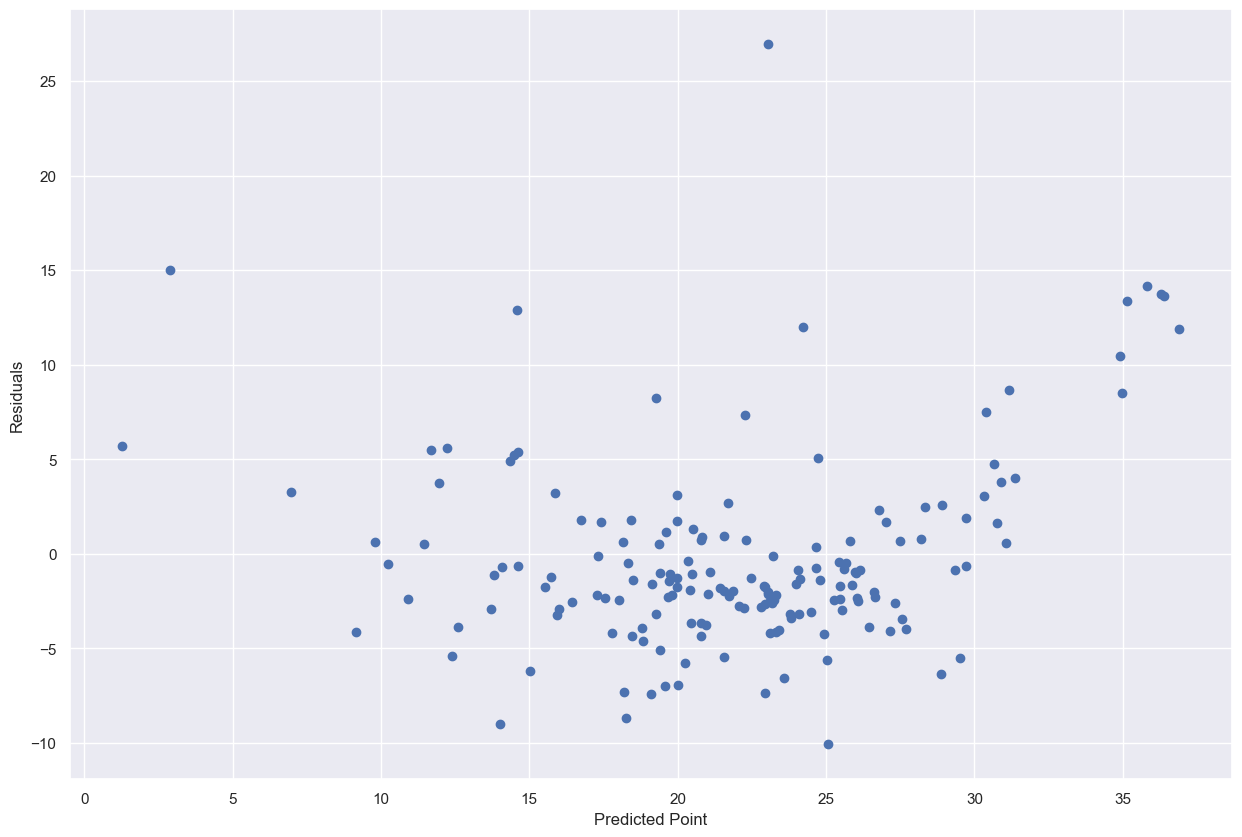

In [81]:
plt.scatter(lasso_pred,residuals)
plt.xlabel("Predicted Point")
plt.ylabel("Residuals")
plt.show()

In [83]:
# Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

26.16637721498099
3.6464026430077423
5.11530812512609


## R squared and adjusted R squared

In [84]:
from sklearn.metrics import r2_score
score = r2_score(y_test,lasso_pred)
score

0.6542429577734992

In [85]:
## Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6248649084339926

# ElasticNet Regression Model

In [86]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train,y_train)
print(elastic.intercept_)
print(elastic.coef_)

22.970796460176988
[-0.36520114  0.         -0.14336748  0.63145824 -0.25193148  2.34999448
 -0.         -0.         -0.         -0.25649969 -1.23951556  0.56384945
 -2.56053213]


In [88]:
## Prediction of the test data
elastic_pred = elastic.predict(X_test)

## Assumptions 

## First Assumption

Text(0, 0.5, 'Predicted Points')

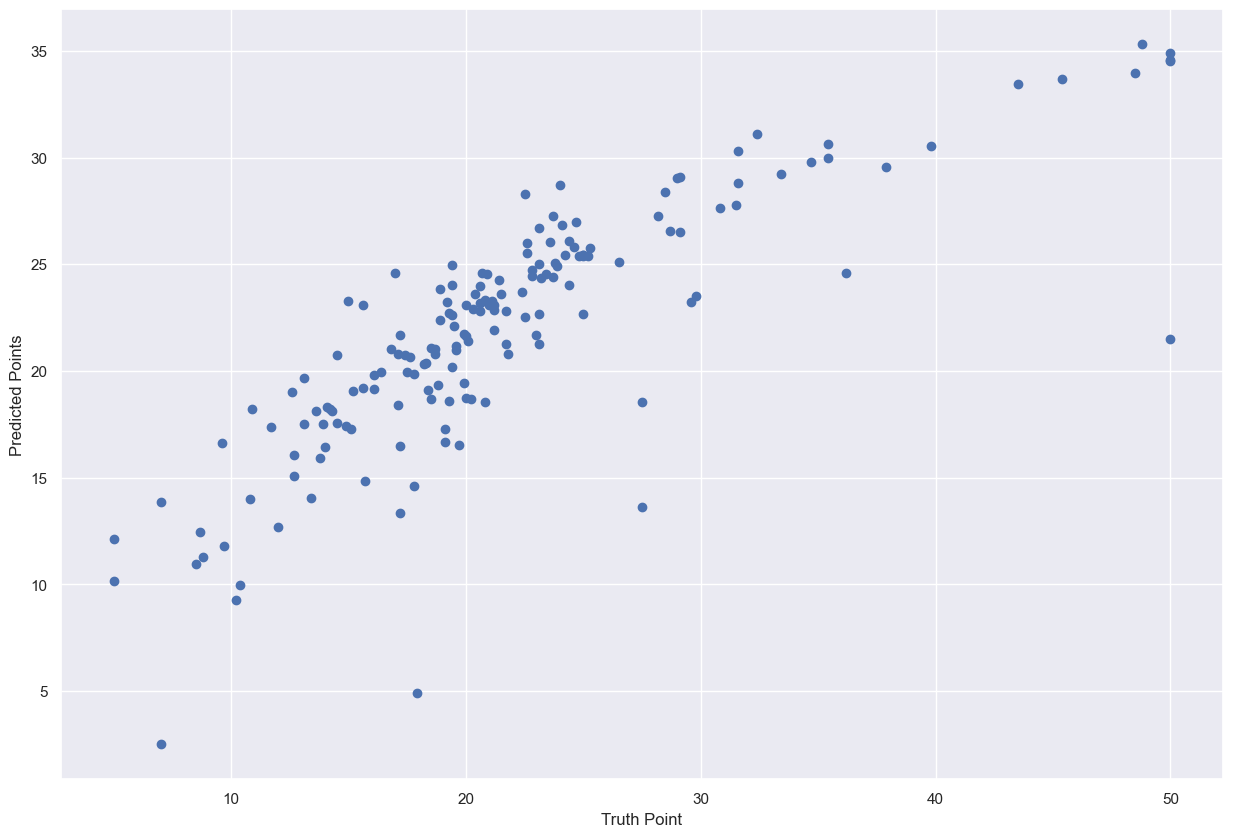

In [89]:
plt.scatter(y_test,elastic_pred)
plt.xlabel("Truth Point")
plt.ylabel("Predicted Points")

## Second Assumption

In [90]:
residuals = y_test-elastic_pred
residuals

173    -2.448027
274     1.285519
491    -4.498452
72     -1.947155
452    -3.030297
         ...    
110     0.428514
321    -1.920378
265    -1.645018
29     -2.106526
262    13.490268
Name: Price, Length: 167, dtype: float64

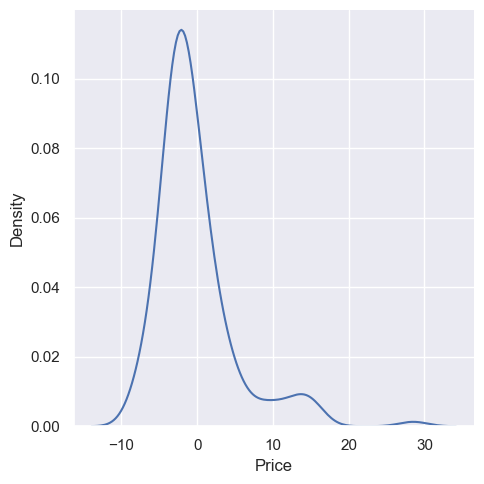

In [91]:
sns.displot(residuals,kind = "kde")

## Third Assumption 

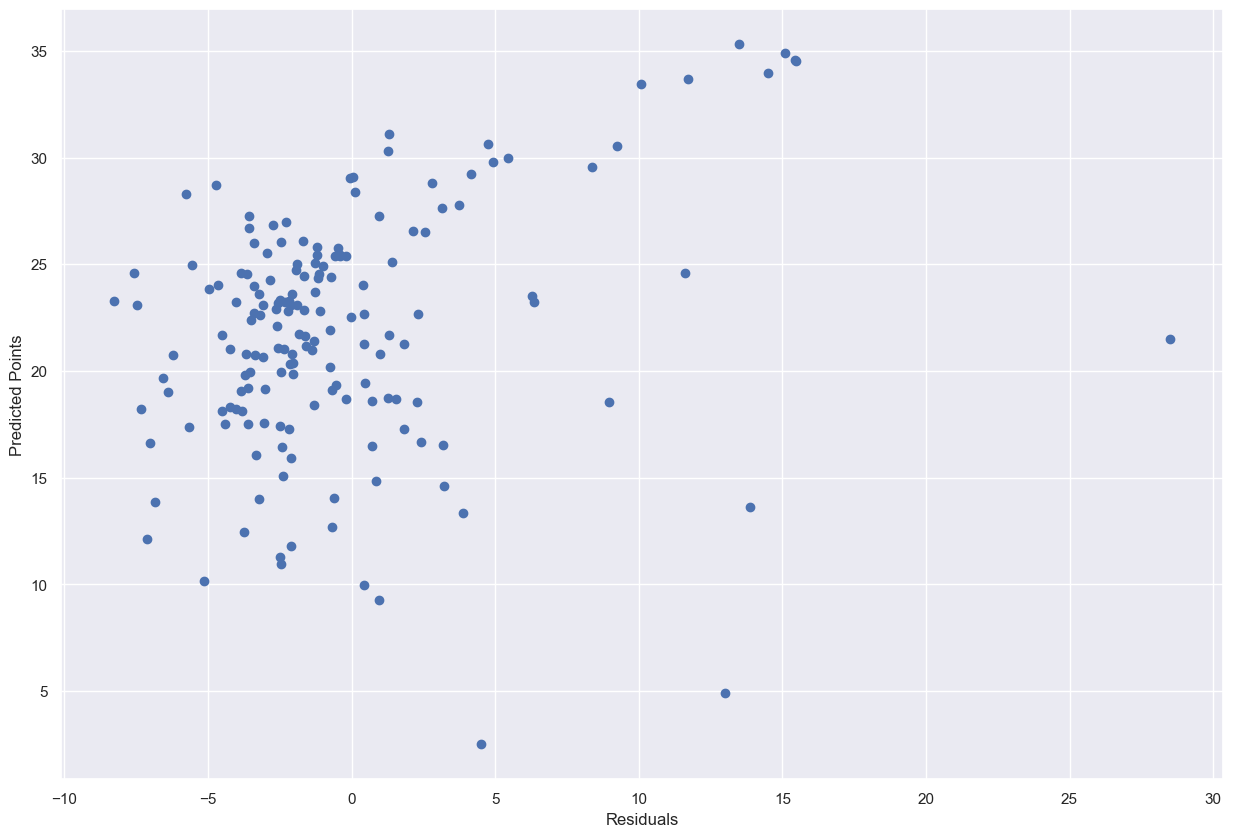

In [92]:
plt.scatter(residuals,elastic_pred)
plt.xlabel("Residuals")
plt.ylabel("Predicted Points")
plt.show()

## R squared and adjsuted R sqaured 

In [93]:
from sklearn.metrics import r2_score
score = r2_score(y_test,elastic_pred)
score

0.641375391902405

In [94]:
## Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.610904019972544